In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import warnings
warnings.filterwarnings('ignore')
alt.renderers.enable('notebook')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_excel("base_de_dados.xlsx")

In [3]:
list(data)

['Agencia',
 'Exercicio_Apurado',
 'Num_Processo',
 'Ministerio',
 'Tipo_Processo',
 'Tipo_Alterado',
 'Status_Processo',
 'Data_Autuacao',
 'Data_Encerramento',
 'Relator',
 'Quantidade_Relatores',
 'Unidade_Tecnica_Responsavel',
 'Unidade_Tecnica_Por_Agir',
 'Confidencialidade',
 'quant_responsaveis',
 'decisao_normativa',
 'instrucao_normativa',
 'deliberacoes_quantidade',
 'determinacoes',
 'recomendacoes',
 'sancoes',
 'alerta']

In [4]:
data.head()

,Agencia,Exercicio_Apurado,Num_Processo,Ministerio,Tipo_Processo,Tipo_Alterado,Status_Processo,Data_Autuacao,Data_Encerramento,Relator,Quantidade_Relatores,Unidade_Tecnica_Responsavel,Unidade_Tecnica_Por_Agir,Confidencialidade,quant_responsaveis,decisao_normativa,instrucao_normativa,deliberacoes_quantidade,determinacoes,recomendacoes,sancoes,alerta
0,I,2010.0,1,a,PC - Prestação de Contas,NÃO,Encerrado,40772.0,41603,ALC,3.0,A,B,Restrito,5,DN 2010-110,IN 2008-057; IN 2010-063,1.0,Não,Sim,Não,Não
1,I,2002.0,2,a,PC - Prestação de Contas,NÃO,Encerrado,37789.0,38484,JN,3.0,B,A,Restrito,5,N/D,IN 2000-037; IN 2002-042; IN 2002-045,1.0,Sim,Não,Não,Não
2,I,2004.0,3,a,PC - Prestação de Contas,SIM,Encerrado,38512.0,39127,BZ,1.0,C,B,Restrito,5,DN 2004-062,IN 2002-045; IN 2004-047,1.0,Sim,Não,Não,Não
3,I,2006.0,4,a,PC - Prestação de Contas,NÃO,Encerrado,39269.0,39968,WR,2.0,A,A,Restrito,5,DN 2006-081,IN 2004-047,1.0,Sim,Não,Não,Não
4,I,2009.0,5,a,PC - Prestação de Contas,NÃO,Encerrado,40386.0,40612,ALC,1.0,B,B,Restrito,5,DN 2009-102,IN 2008-057,1.0,Não,Sim,Não,Sim


## 1. Qual a relação entre a quantidade de processos com
### a) A agência

In [5]:
agencias = pd.DataFrame(data.groupby("Agencia").count()["Exercicio_Apurado"])
agencias.columns = ["Quantidade"]
agencias.reset_index(level=0, inplace=True)
agencias

,Agencia,Quantidade
0,I,12
1,II,7
2,III,19
3,IV,5
4,IX,26
5,V,17
6,VI,17
7,VII,14
8,VIII,10


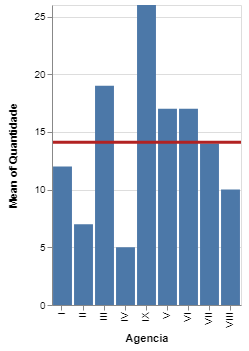

In [6]:
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='Agencia:O',
    y='mean(Quantidade):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7))
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Quantidade):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=agencias)

Este gráfico é interativo. Caso tenha problemas em interagir, clique [aqui](https://bit.ly/2CYRM4H).

[]

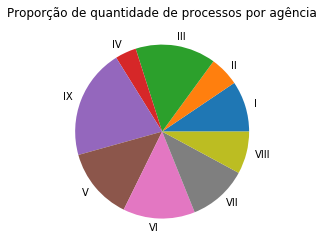

In [7]:
labels = list(agencias['Agencia'])
plt.pie(list(agencias['Quantidade']), labels= labels)
plt.title("Proporção de quantidade de processos por agência")
plt.plot()

### b) O ano

In [8]:
anos = pd.DataFrame(data.groupby("Exercicio_Apurado").count()["Num_Processo"])
anos.reset_index(level=0, inplace=True)
anos.columns = ["Ano", "Quantidade"]
anos["Ano"] = anos["Ano"].astype('int64')
anos

,Ano,Quantidade
0,1997,1
1,1998,2
2,1999,5
3,2000,5
4,2001,5
5,2002,7
6,2003,9
7,2004,8
8,2005,7
9,2006,8


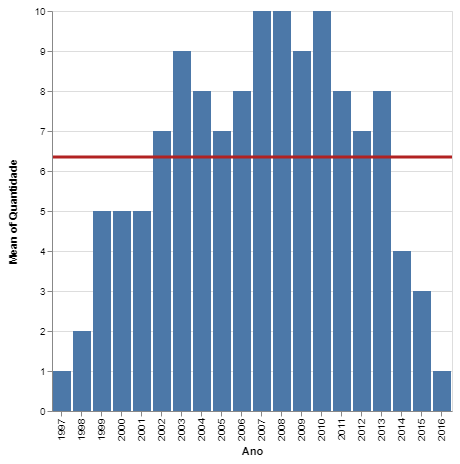

In [9]:
bars = alt.Chart(width=400, height=400).mark_bar().encode(
    x='Ano:O',
    y='mean(Quantidade):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7))
).add_selection(
    brush
)

alt.layer(bars, line, data=anos)

Este gráfico é interativo. Caso tenha problemas em interagir, clique [aqui](https://bit.ly/2HJ4Cto).

[]

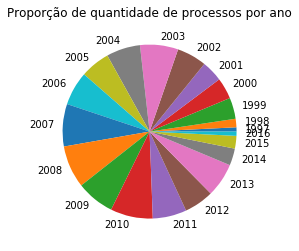

In [10]:
labels = list(anos['Ano'])
plt.pie(list(anos['Quantidade']), labels= labels)
plt.title("Proporção de quantidade de processos por ano")
plt.plot()

### c) A agência em cada ano

In [11]:
aux = pd.DataFrame(data.groupby(["Agencia", "Exercicio_Apurado"]).count()["Num_Processo"])
aux

Num_Processo
Agencia Exercicio_Apurado              
I       2001.0                        1
        2002.0                        1
        2004.0                        1
        2006.0                        2
        2007.0                        2
        2008.0                        1
        2009.0                        1
        2010.0                        2
        2013.0                        1
II      2007.0                        1
        2008.0                        1
        2009.0                        1
        2010.0                        1
        2011.0                        1
        2012.0                        1
        2013.0                        1
III     1997.0                        1
        1998.0                        1
        1999.0                        1
        2000.0                        1
        2001.0                        1
        2002.0                        1
        2003.0                        1
        2004.0                        1
        2005.0                        1
        2006.0                        1
        2007.0                        1
        2008.0                        1
        2009.0                        1
        2010.0                        1
        2011.0                        1
        2012.0                        1
        2013.0                        1
        2014.0                        1
        2015.0                        1
IV      2005.0                        1
        2008.0                        1
        2009.0                        1
        2010.0                        1
        2014.0                        1
IX      1999.0                        1
        2000.0                        1
        2001.0                        1
        2002.0                        2
        2003.0                        2
        2004.0                        2
        2005.0                        2
        2006.0                        2
        2007.0                        2
        2008.0                        2
        2009.0                        2
        2010.0                        1
        2011.0                        2
        2012.0                        1
        2013.0                        2
        2015.0                        1
V       1998.0                        1
        1999.0                        1
        2000.0                        1
        2001.0                        1
        2002.0                        1
        2003.0                        2
        2004.0                        1
        2005.0                        1
        2006.0                        1
        2007.0                        1
        2008.0                        1
        2010.0                        1
        2011.0                        1
        2012.0                        1
        2013.0                        1
        2014.0                        1
VI      1999.0                        2
        2000.0                        1
        2001.0                        1
        2003.0                        2
        2004.0                        1
        2005.0                        1
        2006.0                        1
        2007.0                        1
        2008.0                        1
        2009.0                        1
        2010.0                        1
        2011.0                        1
        2012.0                        1
        2013.0                        1
        2015.0                        1
VII     2000.0                        1
        2002.0                        1
        2003.0                        1
        2004.0                        1
        2005.0                        1
        2006.0                        1
        2007.0                        1
        2008.0                        1
        2009.0                        1
        2010.0                        1
        2011.0                        1
        2012.0             

In [12]:
aux.reset_index(level=0, inplace=True)
aux.reset_index(level=0, inplace=True)
aux["Ano"] = aux["Exercicio_Apurado"].astype('int64')

In [13]:
num = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX']

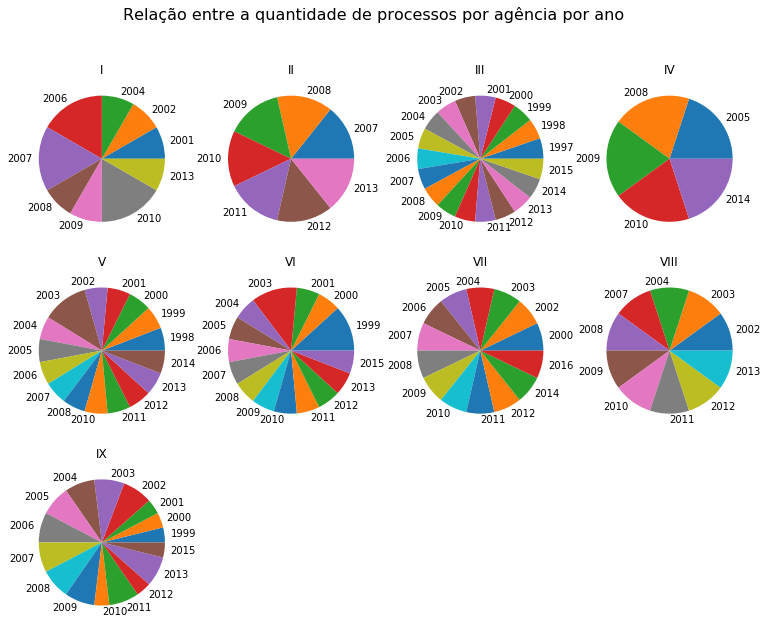

In [14]:
plt.rcParams["figure.figsize"] = [13,10]
k = 0
for i in num:
    k += 1
    plt.subplot(3,4,k)
    labels = list(aux[aux["Agencia"]==i]['Ano'])
    plt.pie(list(aux[aux["Agencia"]==i]['Num_Processo']), labels= labels)
    plt.title(i)
plt.suptitle("Relação entre a quantidade de processos por agência por ano", fontsize=16)
plt.show()

### d) O relator

In [15]:
aux = pd.DataFrame(data.groupby("Relator").count()["Num_Processo"])
aux

,Num_Processo
Relator,
JF,1
AA,2
AB,5
AC,4
AD,1
AI,1
ALC,3
AO,2
BO,5


In [16]:
aux.reset_index(level=0, inplace=True)

[]

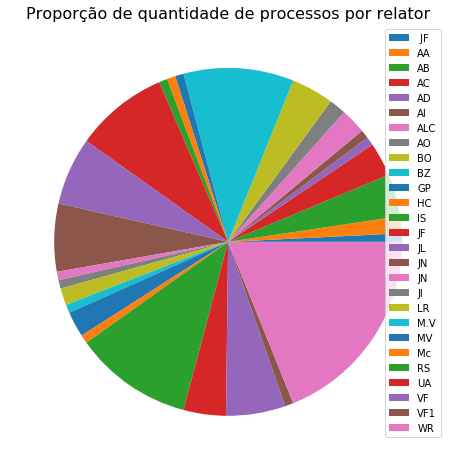

In [17]:
labels = list(aux['Relator'])
plt.rcParams["figure.figsize"] = [13,8]
plt.pie(list(aux['Num_Processo']))
plt.legend(labels)
plt.title("Proporção de quantidade de processos por relator", fontsize=16)
plt.plot()

### e) A quantidade de relatores

In [18]:
qt_relatores = pd.DataFrame(data.groupby("Quantidade_Relatores").count()["Num_Processo"])
qt_relatores

,Num_Processo
Quantidade_Relatores,
1.0,69
2.0,38
3.0,10
4.0,5
5.0,2
7.0,1
10.0,1
13.0,1


Text(0.5, 1.0, 'Relação entre quantidade de processos com a quantidade de relatores')

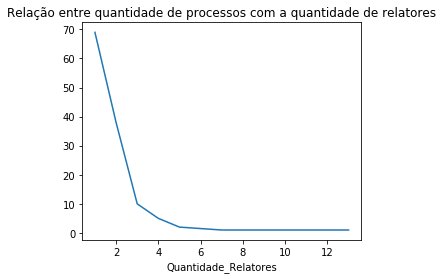

In [19]:
plt.rcParams["figure.figsize"] = [5,4]
qt_relatores.plot(legend=False)
plt.title("Relação entre quantidade de processos com a quantidade de relatores")

### f) A unidade técnica responsável

In [20]:
pd.DataFrame(data.groupby("Unidade_Tecnica_Responsavel").count()["Num_Processo"])

,Num_Processo
Unidade_Tecnica_Responsavel,
A,43
B,42
C,42


## 2) Média de duração por agência e geral?

In [21]:
data["Data_Encerramento"] = data["Data_Encerramento"].replace(["N/D", "N/A"], pd.np.nan)
data2 = data.dropna()
data2["Duracao"] = data2["Data_Encerramento"]-data2["Data_Autuacao"]
duracao_agencia = pd.DataFrame(data2.groupby("Agencia").mean()["Duracao"])
duracao_agencia

,Duracao
Agencia,
I,616.000000
II,775.714286
III,1118.312500
IV,907.750000
IX,1223.133333
V,580.500000
VI,1121.846154
VII,976.700000
VIII,242.857143


In [22]:
duracao_agencia.reset_index(level=0, inplace=True)
duracao_agencia.columns = ["Agencia", "Duracao"]

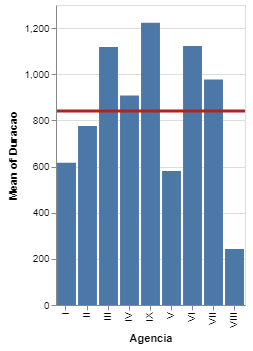

In [23]:
bars = alt.Chart().mark_bar().encode(
    x='Agencia:O',
    y='mean(Duracao):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7))
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Duracao):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=duracao_agencia)

Este gráfico é interativo. Caso tenha problemas em interagir, clique [aqui](https://bit.ly/2Wq8lzo).

## 3) Qual a relação entre a quantidade de responsáveis com:
### a) A agência

In [24]:
pd.DataFrame(data.groupby(["quant_responsaveis", "Agencia"]).count()["Num_Processo"])

Num_Processo
quant_responsaveis Agencia              
5                  I                  12
                   II                  7
                   III                19
                   IV                  5
                   IX                 26
                   V                  17
                   VI                 17
                   VII                14
                   VIII               10

### b) O ano e total

In [25]:
pd.DataFrame(data.groupby(["quant_responsaveis", "Exercicio_Apurado"]).count()["Num_Processo"])

Num_Processo
quant_responsaveis Exercicio_Apurado              
5                  1997.0                        1
                   1998.0                        2
                   1999.0                        5
                   2000.0                        5
                   2001.0                        5
                   2002.0                        7
                   2003.0                        9
                   2004.0                        8
                   2005.0                        7
                   2006.0                        8
                   2007.0                       10
                   2008.0                       10
                   2009.0                        9
                   2010.0                       10
                   2011.0                        8
                   2012.0                        7
                   2013.0                        8
                   2014.0                        4
                   2015.0                        3
                   2016.0                        1

### c) O relator

In [26]:
aux = pd.DataFrame(data.groupby(["quant_responsaveis", "Relator"]).count()["Num_Processo"])
aux

Num_Processo
quant_responsaveis Relator              
5                   JF                 1
                   AA                  2
                   AB                  5
                   AC                  4
                   AD                  1
                   AI                  1
                   ALC                 3
                   AO                  2
                   BO                  5
                   BZ                 13
                   GP                  1
                   HC                  1
                   IS                  1
                   JF                 11
                   JL                  8
                   JN                  8
                   JN                  1
                   Jl                  1
                   LR                  2
                   M.V                 1
                   MV                  3
                   Mc                  1
                   RS                 14
                   UA                  5
                   VF                  7
                   VF1                 1
                   WR                 24

### d) A unidade técnica responsável

In [27]:
resps_resp = pd.DataFrame(data.groupby(["quant_responsaveis", "Unidade_Tecnica_Responsavel"]).count()["Num_Processo"])
resps_resp

Num_Processo
quant_responsaveis Unidade_Tecnica_Responsavel              
5                  A                                      43
                   B                                      42
                   C                                      42

### e) A unidade técnica por agir

In [28]:
pd.DataFrame(data.groupby(["quant_responsaveis", "Unidade_Tecnica_Por_Agir"]).count()["Num_Processo"])

Num_Processo
quant_responsaveis Unidade_Tecnica_Por_Agir              
5                  A                                   63
                   B                                   64

## 4) Qual a relação entre a decisão normativa com

### a) A agência

In [29]:
aux = pd.DataFrame(data.groupby(["decisao_normativa", "Agencia"]).count()["Num_Processo"])
aux

Num_Processo
decisao_normativa Agencia              
DN 2004-062       I                   1
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2005-71        III                 1
                  IV                  1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
DN 2006-081       I                   2
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
DN 2007-085       I                   2
                  II                  1
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2008-094       I                   1
                  II                  1
                  III                 1
                  IV                  1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2009-102       I                   1
                  II                  1
                  III                 1
                  IV                  1
                  IX                  2
                  VI                  1
                  VII                 1
                  VIII                1
DN 2010-110       I                   2
                  II                  1
                  III                 1
                  IV                  1
                  IX                  1
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2011-117       II                  1
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2012-124       II                  1
                  III                 1
                  IX                  1
                  V                   1
                  VI                  1
                  VII                 1
                  VIII                1
DN 2013-132       I                   1
                  II                  1
                  III                 1
                  IX                  2
                  V                   1
                  VI                  1
                  VIII                1
DN 2014-140       III                 1
                  IV                  1
                  V                   1
                  VII                 1
DN 2015-147       III                 1
                  IX                  1
                  VI                  1
DN 2016-156       VII                 1
N/D               I                   2
                  III                 7
                  IX                  7
                  V                   7
                  VI                  6
                  VII                 3
                  VIII                2

In [30]:
aux.reset_index(level=0, inplace=True)
aux.reset_index(level=0, inplace=True)

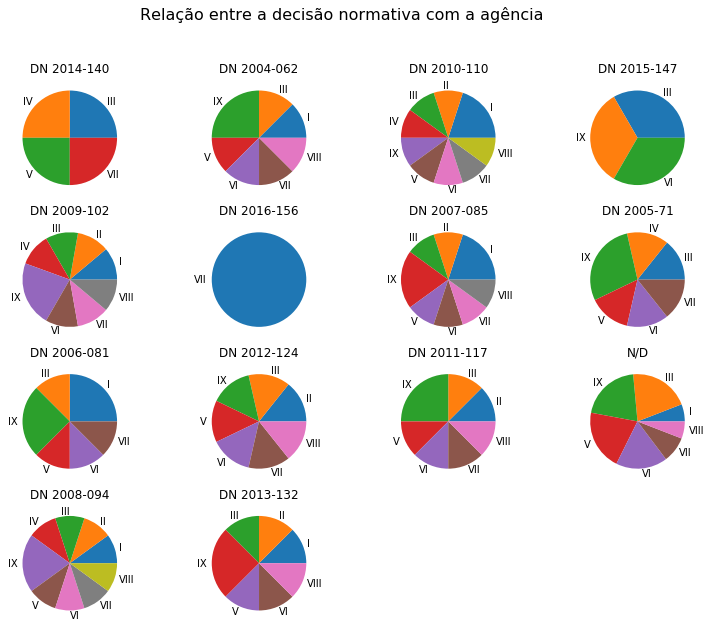

In [31]:
plt.rcParams["figure.figsize"] = [13,10]
k = 0
for i in set(aux['decisao_normativa']):
    k += 1
    plt.subplot(4,4,k)
    labels = list(aux[aux["decisao_normativa"]==i]['Agencia'])
    plt.pie(list(aux[aux["decisao_normativa"]==i]['Num_Processo']), labels= labels)
    plt.title(i)
plt.suptitle("Relação entre a decisão normativa com a agência", fontsize=16)
plt.show()

### b) O ano e total

In [32]:
pd.DataFrame(data.groupby(["decisao_normativa", "Exercicio_Apurado"]).count()["Num_Processo"])

,,Num_Processo
decisao_normativa,Exercicio_Apurado,
DN 2004-062,2004.0,8
DN 2005-71,2005.0,7
DN 2006-081,2006.0,8
DN 2007-085,2007.0,10
DN 2008-094,2008.0,10
DN 2009-102,2009.0,9
DN 2010-110,2010.0,10
DN 2011-117,2011.0,8
DN 2012-124,2012.0,7


### c) O relator

In [33]:
aux = pd.DataFrame(data.groupby(["decisao_normativa", "Relator"]).count()["Num_Processo"])
aux

Num_Processo
decisao_normativa Relator              
DN 2004-062       AO                  1
                  BZ                  3
                  JF                  1
                  JN                  2
                  WR                  1
DN 2005-71        AA                  1
                  AI                  1
                  JF                  1
                  JN                  1
                  RS                  2
                  WR                  1
DN 2006-081       AB                  1
                  BO                  1
                  BZ                  2
                  RS                  1
                  WR                  3
DN 2007-085       AB                  1
                  BO                  1
                  BZ                  3
                  M.V                 1
                  RS                  1
                  WR                  3
DN 2008-094       AC                  1
                  JF                  2
                  JL                  2
                  JN                  1
                  Jl                  1
                  RS                  1
                  VF                  1
                  WR                  1
DN 2009-102       AC                  1
                  ALC                 1
                  JF                  1
                  JL                  2
                  RS                  2
                  VF1                 1
                  WR                  1
DN 2010-110       AC                  1
                  ALC                 2
                  JF                  1
                  JL                  1
                  LR                  1
                  RS                  2
                  VF                  1
                  WR                  1
DN 2011-117        JF                 1
                  AO                  1
                  JF                  1
                  RS                  2
                  WR                  3
DN 2012-124       JF                  2
                  JL                  1
                  JN                  1
                  RS                  1
                  WR                  2
DN 2013-132       AA                  1
                  BZ                  2
                  Mc                  1
                  VF                  2
                  WR                  2
DN 2014-140       AC                  1
                  BZ                  2
                  VF                  1
DN 2015-147       BO                  2
                  JF                  1
DN 2016-156       BO                  1
N/D               AB                  3
                  AD                  1
                  BZ                  1
                  GP                  1
                  HC                  1
                  IS                  1
                  JF                  1
                  JL                  2
                  JN                  3
                  JN                  1
                  LR                  1
                  MV                  3
                  RS                  2
                  UA                  5
                  VF                  2
                  WR                  6

In [34]:
aux.reset_index(level=0, inplace=True)
aux.reset_index(level=0, inplace=True)

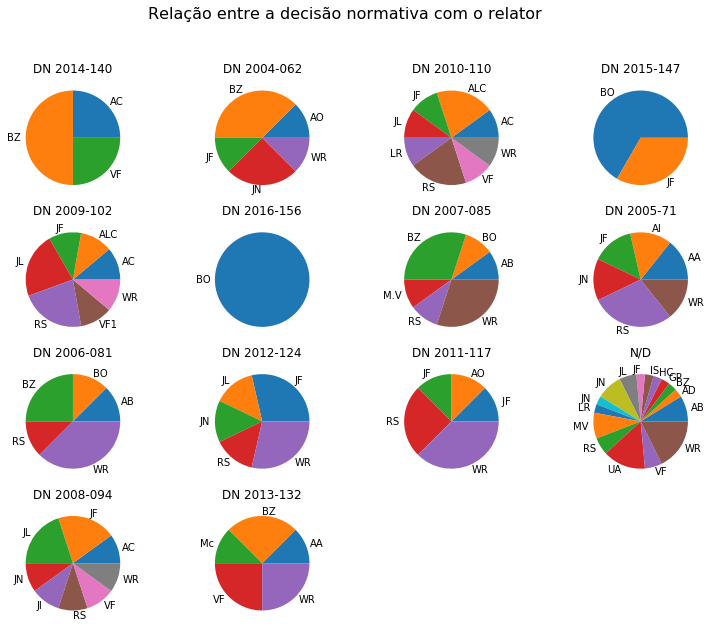

In [35]:
plt.rcParams["figure.figsize"] = [13,10]
k = 0
for i in set(aux['decisao_normativa']):
    k += 1
    plt.subplot(4,4,k)
    labels = list(aux[aux["decisao_normativa"]==i]['Relator'])
    plt.pie(list(aux[aux["decisao_normativa"]==i]['Num_Processo']), labels= labels)
    plt.title(i)
plt.suptitle("Relação entre a decisão normativa com o relator", fontsize=16)
plt.show()

### d) A unidade técnica responsável

In [36]:
aux = pd.DataFrame(data.groupby(["decisao_normativa", "Unidade_Tecnica_Responsavel"]).count()["Num_Processo"])
aux

Num_Processo
decisao_normativa Unidade_Tecnica_Responsavel              
DN 2004-062       A                                       1
                  B                                       4
                  C                                       3
DN 2005-71        A                                       2
                  B                                       3
                  C                                       2
DN 2006-081       A                                       3
                  B                                       1
                  C                                       4
DN 2007-085       A                                       3
                  B                                       2
                  C                                       5
DN 2008-094       A                                       3
                  B                                       2
                  C                                       5
DN 2009-102       A                                       4
                  B                                       4
                  C                                       1
DN 2010-110       A                                       2
                  B                                       3
                  C                                       5
DN 2011-117       A                                       5
                  B                                       2
                  C                                       1
DN 2012-124       A                                       3
                  B                                       3
                  C                                       1
DN 2013-132       A                                       1
                  B                                       4
                  C                                       3
DN 2014-140       A                                       2
                  B                                       1
                  C                                       1
DN 2015-147       A                                       1
                  B                                       2
DN 2016-156       B                                       1
N/D               A                                      13
                  B                                      10
                  C                                      11

In [37]:
aux.reset_index(level=0, inplace=True)
aux.reset_index(level=0, inplace=True)

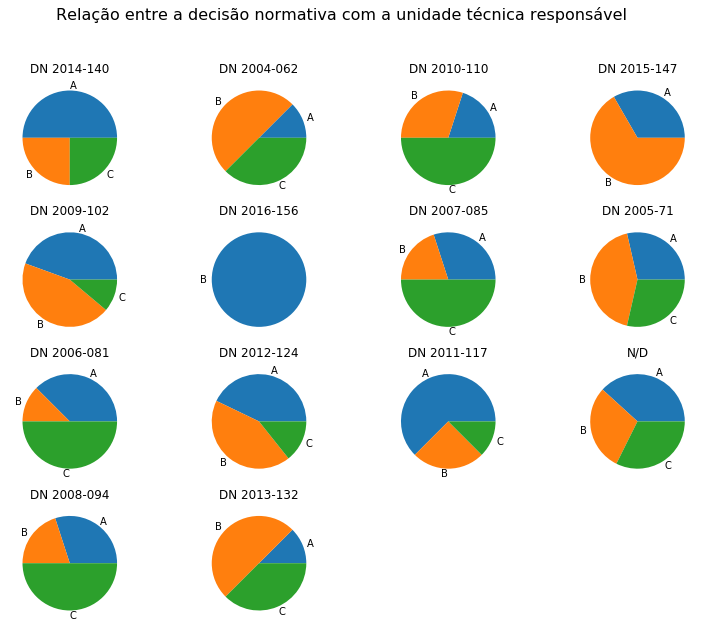

In [38]:
plt.rcParams["figure.figsize"] = [13,10]
k = 0
for i in set(aux['decisao_normativa']):
    k += 1
    plt.subplot(4,4,k)
    labels = list(aux[aux["decisao_normativa"]==i]['Unidade_Tecnica_Responsavel'])
    plt.pie(list(aux[aux["decisao_normativa"]==i]['Num_Processo']), labels= labels)
    plt.title(i)
plt.suptitle("Relação entre a decisão normativa com a unidade técnica responsável", fontsize=16)
plt.show()

### e) A unidade técnica por agir

In [39]:
aux = pd.DataFrame(data.groupby(["decisao_normativa", "Unidade_Tecnica_Por_Agir"]).count()["Num_Processo"])
aux

Num_Processo
decisao_normativa Unidade_Tecnica_Por_Agir              
DN 2004-062       A                                    4
                  B                                    4
DN 2005-71        A                                    3
                  B                                    4
DN 2006-081       A                                    3
                  B                                    5
DN 2007-085       A                                    5
                  B                                    5
DN 2008-094       A                                    5
                  B                                    5
DN 2009-102       A                                    5
                  B                                    4
DN 2010-110       A                                    4
                  B                                    6
DN 2011-117       A                                    2
                  B                                    6
DN 2012-124       A                                    4
                  B                                    3
DN 2013-132       A                                    5
                  B                                    3
DN 2014-140       A                                    3
                  B                                    1
DN 2015-147       A                                    1
                  B                                    2
DN 2016-156       B                                    1
N/D               A                                   19
                  B                                   15

In [40]:
aux.reset_index(level=0, inplace=True)
aux.reset_index(level=0, inplace=True)

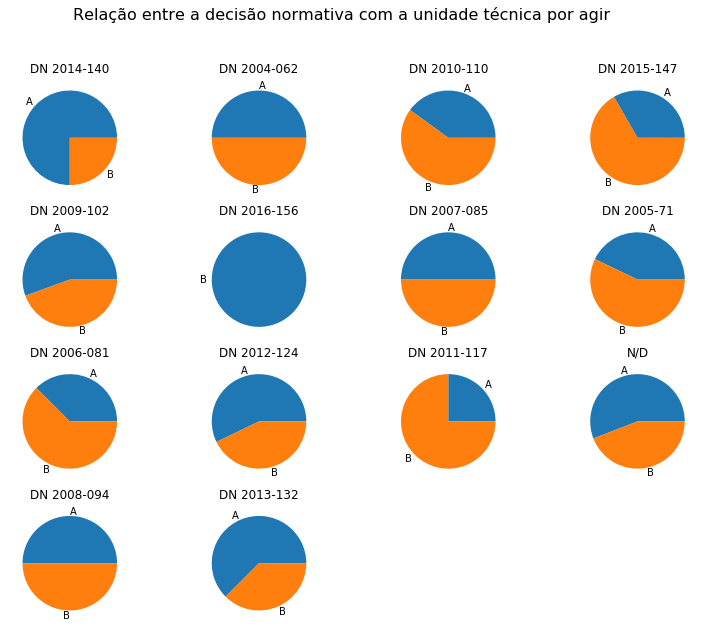

In [41]:
plt.rcParams["figure.figsize"] = [13,10]
k = 0
for i in set(aux['decisao_normativa']):
    k += 1
    plt.subplot(4,4,k)
    labels = list(aux[aux["decisao_normativa"]==i]['Unidade_Tecnica_Por_Agir'])
    plt.pie(list(aux[aux["decisao_normativa"]==i]['Num_Processo']), labels= labels)
    plt.title(i)
plt.suptitle("Relação entre a decisão normativa com a unidade técnica por agir", fontsize=16)
plt.show()

## 5) Qual a relação entre a quantidade de deliberações com

### a) A agência

In [42]:
aux = pd.DataFrame(data.groupby(['deliberacoes_quantidade','Agencia']).count()["Num_Processo"])
aux

Num_Processo
deliberacoes_quantidade Agencia              
0.0                     VII                 1
1.0                     I                  11
                        II                  7
                        III                17
                        IV                  5
                        IX                 15
                        V                  15
                        VI                 13
                        VII                10
                        VIII                7
2.0                     I                   1
                        IX                  2
                        V                   1
                        VI                  3
                        VII                 2
                        VIII                2
3.0                     VI                  1
4.0                     IX                  2
                        VIII                1
5.0                     VII                 1
6.0                     III                 1
                        IX                  1
7.0                     IX                  2
9.0                     IX                  2

In [43]:
aux.reset_index(level=0, inplace=True)
aux.reset_index(level=0, inplace=True)

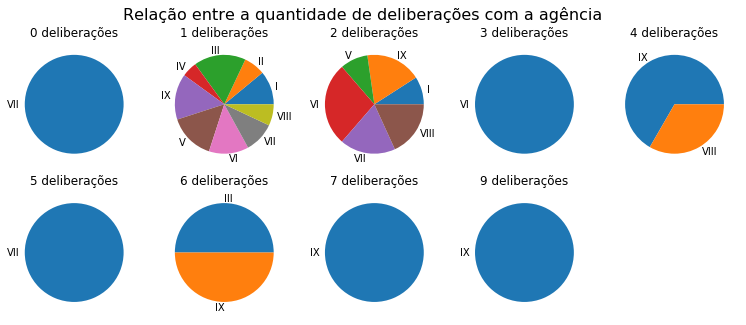

In [44]:
plt.rcParams["figure.figsize"] = [13,5]
for i in list(range(10)):
    if i!=9:
        plt.subplot(250+i+1)
    elif i==9:
        plt.subplot(250+i)
    labels = list(aux[aux["deliberacoes_quantidade"]==i]['Agencia'])
    plt.pie(list(aux[aux["deliberacoes_quantidade"]==i]['Num_Processo']), labels= labels)
    plt.title(str(i)+' deliberações')
plt.suptitle("Relação entre a quantidade de deliberações com a agência", fontsize=16)
plt.show()

### b) O ano e total

In [45]:
aux = pd.DataFrame(data.groupby(['deliberacoes_quantidade', 'Exercicio_Apurado']).count()['Num_Processo'])
aux

Num_Processo
deliberacoes_quantidade Exercicio_Apurado              
0.0                     2016.0                        1
1.0                     1997.0                        1
                        1998.0                        2
                        1999.0                        3
                        2000.0                        5
                        2001.0                        3
                        2002.0                        6
                        2003.0                        7
                        2004.0                        4
                        2005.0                        5
                        2006.0                        7
                        2007.0                        9
                        2008.0                        7
                        2009.0                        8
                        2010.0                       10
                        2011.0                        7
                        2012.0                        4
                        2013.0                        7
                        2014.0                        4
                        2015.0                        1
2.0                     1999.0                        2
                        2001.0                        1
                        2004.0                        1
                        2005.0                        1
                        2008.0                        2
                        2011.0                        1
                        2012.0                        2
                        2013.0                        1
3.0                     2003.0                        1
4.0                     2006.0                        1
                        2008.0                        1
                        2009.0                        1
5.0                     2004.0                        1
6.0                     2001.0                        1
                        2003.0                        1
7.0                     2005.0                        1
                        2007.0                        1
9.0                     2002.0                        1
                        2004.0                        1

In [46]:
aux.reset_index(level=0, inplace=True)
aux.reset_index(level=0, inplace=True)
aux["Exercicio_Apurado"] = aux["Exercicio_Apurado"].astype('int64')

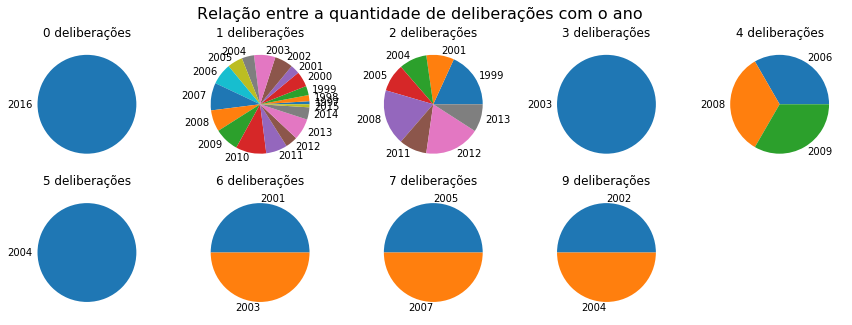

In [47]:
plt.rcParams["figure.figsize"] = [15,5]
for i in list(range(10)):
    if i!=9:
        plt.subplot(250+i+1)
    elif i==9:
        plt.subplot(250+i)
    labels = list(aux[aux["deliberacoes_quantidade"]==i]['Exercicio_Apurado'])
    plt.pie(list(aux[aux["deliberacoes_quantidade"]==i]['Num_Processo']), labels= labels)
    plt.title(str(i)+' deliberações')
plt.suptitle("Relação entre a quantidade de deliberações com o ano", fontsize=16)
plt.show()

### c) O relator

In [48]:
aux = pd.DataFrame(data.groupby(['deliberacoes_quantidade', 'Relator']).count()['Num_Processo'])
aux

Num_Processo
deliberacoes_quantidade Relator              
0.0                     BO                  1
1.0                     AA                  1
                        AB                  5
                        AC                  4
                        AD                  1
                        AI                  1
                        ALC                 3
                        AO                  1
                        BZ                 10
                        GP                  1
                        HC                  1
                        IS                  1
                        JF                  7
                        JL                  5
                        JN                  8
                        JN                  1
                        Jl                  1
                        LR                  2
                        M.V                 1
                        MV                  3
                        Mc                  1
                        RS                 11
                        UA                  5
                        VF                  4
                        WR                 22
2.0                      JF                 1
                        AO                  1
                        BZ                  1
                        JF                  2
                        JL                  2
                        RS                  2
                        WR                  2
3.0                     VF                  1
4.0                     BO                  1
                        VF                  1
                        VF1                 1
5.0                     JF                  1
6.0                     JL                  1
                        RS                  1
7.0                     AA                  1
                        BO                  1
9.0                     BZ                  1
                        VF                  1

In [49]:
aux.reset_index(level=0, inplace=True)
aux.reset_index(level=0, inplace=True)

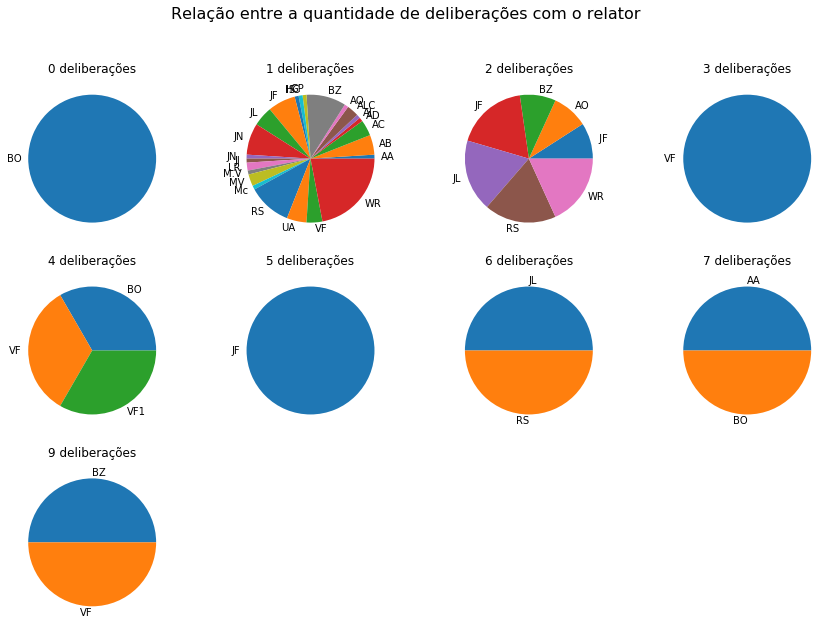

In [50]:
plt.rcParams["figure.figsize"] = [15,10]
for i in list(range(10)):
    if i!=9:
        plt.subplot(340+i+1)
    elif i==9:
        plt.subplot(340+i)
    labels = list(aux[aux["deliberacoes_quantidade"]==i]['Relator'])
    plt.pie(list(aux[aux["deliberacoes_quantidade"]==i]['Num_Processo']), labels= labels)
    plt.title(str(i)+' deliberações')
plt.suptitle("Relação entre a quantidade de deliberações com o relator", fontsize=16)
plt.show()

### d) A unidade técnica responsável

In [51]:
qtdeliberacoes_resp = pd.DataFrame(data.groupby(['deliberacoes_quantidade', "Unidade_Tecnica_Responsavel"]).count()[
    'Num_Processo'])
qtdeliberacoes_resp

Num_Processo
deliberacoes_quantidade Unidade_Tecnica_Responsavel              
0.0                     B                                       1
1.0                     A                                      32
                        B                                      33
                        C                                      35
2.0                     A                                       4
                        B                                       3
                        C                                       4
3.0                     B                                       1
4.0                     A                                       3
5.0                     A                                       1
6.0                     A                                       1
                        C                                       1
7.0                     B                                       1
                        C                                       1
9.0                     B                                       1
                        C                                       1

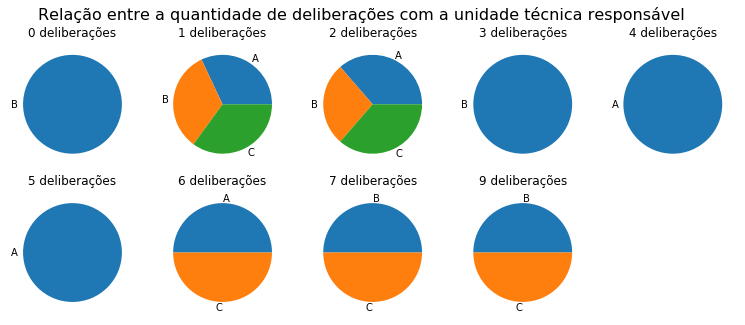

In [52]:
qtdeliberacoes_resp.reset_index(level=0, inplace=True)
qtdeliberacoes_resp.reset_index(level=0, inplace=True)
ax = []
plt.rcParams["figure.figsize"] = [13,5]
for i in list(range(10)):
    if i!=9:
        ax.append(plt.subplot(250+i+1))
    elif i==9:
        ax.append(plt.subplot(250+i))
    labels = list(qtdeliberacoes_resp[qtdeliberacoes_resp["deliberacoes_quantidade"]==i]["Unidade_Tecnica_Responsavel"])
    ax[i] = plt.pie(list(qtdeliberacoes_resp[qtdeliberacoes_resp["deliberacoes_quantidade"]==i]['Num_Processo']), labels= labels)
    ax[i] = plt.title(str(i)+' deliberações')
plt.suptitle("Relação entre a quantidade de deliberações com a unidade técnica responsável", fontsize=16)
plt.show()

### e) A unidade técnica por agir

In [53]:
aux = pd.DataFrame(data.groupby(['deliberacoes_quantidade', "Unidade_Tecnica_Por_Agir"]).count()['Num_Processo'])
aux

Num_Processo
deliberacoes_quantidade Unidade_Tecnica_Por_Agir              
0.0                     B                                    1
1.0                     A                                   50
                        B                                   50
2.0                     A                                    7
                        B                                    4
3.0                     B                                    1
4.0                     A                                    2
                        B                                    1
5.0                     B                                    1
6.0                     A                                    1
                        B                                    1
7.0                     A                                    2
9.0                     B                                    2

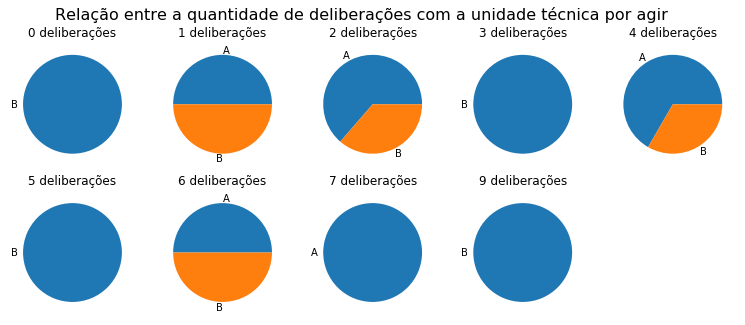

In [54]:
aux.reset_index(level=0, inplace=True)
aux.reset_index(level=0, inplace=True)
plt.rcParams["figure.figsize"] = [13,5]
for i in list(range(10)):
    if i!=9:
        plt.subplot(250+i+1)
    elif i==9:
        plt.subplot(250+i)
    labels = list(aux[aux["deliberacoes_quantidade"]==i]['Unidade_Tecnica_Por_Agir'])
    plt.pie(list(aux[aux["deliberacoes_quantidade"]==i]['Num_Processo']), labels= labels)
    plt.title(str(i)+' deliberações')
plt.suptitle("Relação entre a quantidade de deliberações com a unidade técnica por agir", fontsize=16)
plt.show()